### Import the required libraries: 
pandas, matplotlib, numpy and the linear_model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

### Read the file into a data frame and show the first 5 rows

In [2]:
df = pd.read_csv("honeyproduction.csv")
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


### What is the mean total production for each year?
+ Group the data by year 
+ Calculate the mean of the total production for each year

In [3]:
prod_per_year = df.groupby('year').totalprod.mean().reset_index()
prod_per_year

,year,totalprod
0,1998,5.105093e+06
1,1999,4.706674e+06
2,2000,5.106000e+06
3,2001,4.221545e+06
4,2002,3.892386e+06
5,2003,4.122091e+06
6,2004,4.456805e+06
7,2005,4.243146e+06
8,2006,3.761902e+06
9,2007,3.600512e+06


### Convert the year column to a suitable format for the model 
+ Grab the year column to a variable
+ Reshape it into a 1x1 matrix (1 column with many rows)

In [4]:
X = prod_per_year['year']
X = X.values.reshape(-1,1)
X

array([[1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012]], dtype=int64)

### Get the totalprod column into the variable Y

In [5]:
y = prod_per_year['totalprod']
y

0     5.105093e+06
1     4.706674e+06
2     5.106000e+06
3     4.221545e+06
4     3.892386e+06
5     4.122091e+06
6     4.456805e+06
7     4.243146e+06
8     3.761902e+06
9     3.600512e+06
10    3.974927e+06
11    3.626700e+06
12    4.382350e+06
13    3.680025e+06
14    3.522675e+06
Name: totalprod, dtype: float64

### Draw a scatter plot of the totalprod against the year (y vs X)
+ There seems to be a decline in the total production as the years come by

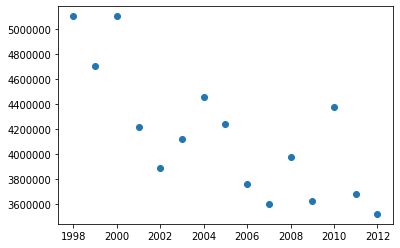

In [6]:
plt.scatter(X, y)
plt.show()

### Create a model which is an instance of from the LinearRegression constructor

In [7]:
regr = linear_model.LinearRegression()

### Feed in the X and y data to fit the model

In [8]:
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Print the coefficient and intercept of the line
+ The negative coefficient matches the decline in total production we saw in our earlier graph 

In [9]:
print(regr.coef_[0])
print(regr.intercept_)

-88303.18915238194
181208083.1073298


### Using the coefficient and intercept
+ The model calculates (predicts) the value of y using the values in X

In [10]:
y_predict = regr.predict(X)
y_predict

array([4778311.18087068, 4690007.99171829, 4601704.8025659 ,
       4513401.61341354, 4425098.42426115, 4336795.23510876,
       4248492.04595637, 4160188.85680401, 4071885.66765162,
       3983582.47849923, 3895279.28934684, 3806976.10019448,
       3718672.91104209, 3630369.7218897 , 3542066.53273734])

### Plot the predicted values against X on top of the earlier graph
+ The orange dots are the values our model predicted

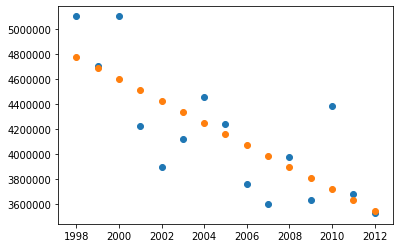

In [11]:
plt.scatter(X, y)
plt.scatter(X, y_predict)
plt.show()

### Using the model what will be the total production in 2050?

- Use numpy.array and range functions to create an array from 2013 to 2050 and assign it to X_future
- Convert the array to a 1x1 matrix - 

In [12]:
X_future = np.array(range(2013, 2050))
X_future = X_future.reshape(-1, 1)
X_future

array([[2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019],
       [2020],
       [2021],
       [2022],
       [2023],
       [2024],
       [2025],
       [2026],
       [2027],
       [2028],
       [2029],
       [2030],
       [2031],
       [2032],
       [2033],
       [2034],
       [2035],
       [2036],
       [2037],
       [2038],
       [2039],
       [2040],
       [2041],
       [2042],
       [2043],
       [2044],
       [2045],
       [2046],
       [2047],
       [2048],
       [2049]])

### Use the model we created regr to predict the column totalprod for the values in X_future

In [13]:
future_predict = regr.predict(X_future)

### Plot the various graphs on top of each other to show the relationships
+ The **blue line** shows the mean total production from the original data: *1998 to 2012*
+ The **orange line** is the predicted values using the model for the data: *1998 to 2012*
+ The **green line** shows a prediction using the same model for the data: *2013 to 2050*

#### According to the graph, total production will be less than 1 million 

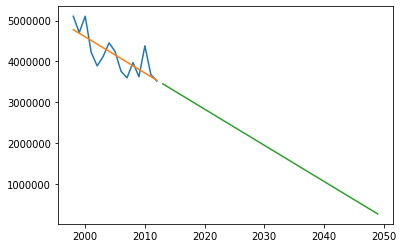

In [14]:
plt.plot(X, y)
plt.plot(X, y_predict)
plt.plot(X_future, future_predict)
plt.show()